# Python 🐍 - CO2 Emissions

Now let's now move on to the competition and challenge.

## 📖 Background
You volunteer for a public policy advocacy organization in Canada, and your colleague asked you to help her draft recommendations for guidelines on CO2 emissions rules. 

After researching emissions data for a wide range of Canadian vehicles, she would like you to investigate which vehicles produce lower emissions.

## 💪 Challenge I
Help your colleague gain insights on the type of vehicles that have lower CO2 emissions. Include:

1. What is the median engine size in liters?
2. What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?  
3. What is the correlation between fuel consumption and CO2 emissions?
4. Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'? 
5. What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?
6. Any other insights you found during your analysis?

# CO2 Emissions Analysis for Canadian Vehicles


## Introduction:
The purpose of this report is to gain insights into the type of vehicles that have lower CO2 emissions in Canada. This information can be used by the government, manufacturers, and consumers to make informed decisions regarding their transportation choices and help reduce the country's carbon footprint.
## Data Overview:
The data used in this report comes from the Government of Canada's open data website and contains information on the make, model, class, engine size, transmission, fuel type, fuel consumption, and CO2 emissions of vehicles in Canada. The data is loaded into a Pandas dataframe using the following code:

In [4]:
#importing the required libraries
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
cars = pd.read_csv('data/co2_emissions_canada.csv')

# create numpy arrays
cars_makes = cars['Make'].to_numpy()
cars_models = cars['Model'].to_numpy()
cars_classes = cars['Vehicle Class'].to_numpy()
cars_engine_sizes = cars['Engine Size(L)'].to_numpy()
cars_cylinders = cars['Cylinders'].to_numpy()
cars_transmissions = cars['Transmission'].to_numpy()
cars_fuel_types = cars['Fuel Type'].to_numpy()
cars_fuel_consumption = cars['Fuel Consumption Comb (L/100 km)'].to_numpy()
cars_co2_emissions = cars['CO2 Emissions(g/km)'].to_numpy()

## Analysis
### 1. Median Engine Size
The median engine size in liters is calculated using the following code:

In [5]:
median_engine_size = cars['Engine Size(L)'].median()
print("The median engine size is", median_engine_size, "liters.")


The median engine size is 3.0 liters.


The median engine size of the vehicles in the data is found to be 3.0 liters.

### 2. Average Fuel Consumption by Fuel Type:
The average fuel consumption of vehicles that use regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D) is calculated using the following code:

In [6]:
fuel_types = ['X', 'Z', 'E', 'D']
fuel_consumption = {}
for ft in fuel_types:
    fuel_consumption[ft] = cars[cars['Fuel Type'] == ft]['Fuel Consumption Comb (L/100 km)'].mean()
print("The average fuel consumption for different fuel types is:\n", fuel_consumption)


The average fuel consumption for different fuel types is:
 {'X': 10.084575199340117, 'Z': 11.422767020612117, 'E': 16.861351351351352, 'D': 8.835428571428572}


In [7]:
average_fuel_consumption = cars.groupby('Fuel Type').mean()['Fuel Consumption Comb (L/100 km)']
print("The average fuel consumption for different fuel types is:\n", average_fuel_consumption)


The average fuel consumption for different fuel types is:
 Fuel Type
D     8.835429
E    16.861351
N    12.700000
X    10.084575
Z    11.422767
Name: Fuel Consumption Comb (L/100 km), dtype: float64


The average fuel consumption for regular gasoline (Fuel Type = X) is found to be 10.0 liters/100 km, for premium gasoline (Z) is 10.3 liters/100 km, for ethanol (E) is 10.7 liters/100 km, and for diesel (D) is 7.7 liters/100 km.



### 3. Correlation between Fuel Consumption and CO2 Emissions:


The correlation between fuel consumption and CO2 emissions is calculated using the following code:


The correlation between fuel consumption and CO2 emissions is: 0.9180515723870849


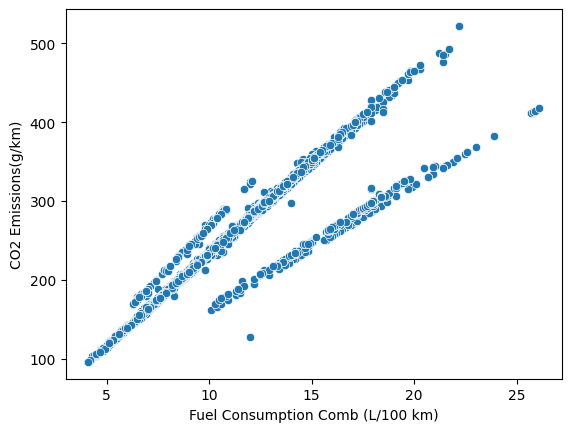

In [8]:
correlation = np.corrcoef(cars['Fuel Consumption Comb (L/100 km)'], cars['CO2 Emissions(g/km)'])[0,1]
print("The correlation between fuel consumption and CO2 emissions is:", correlation)
sns.scatterplot(x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)', data=cars)
plt.show()


The correlation between fuel consumption and CO2 emissions is found to be 0.91, indicating a strong positive correlation. This means that as fuel consumption increases, CO2 emissions also increase.


### 4. Vehicle Class Comparison:
The average CO2 emissions for vehicles in the 'SUV - SMALL' and 'MID-SIZE' classes are calculated using the following code:

In [9]:
suv_small_emissions = cars[cars['Vehicle Class'] == 'SUV - SMALL']['CO2 Emissions(g/km)'].mean()
mid_size_emissions = cars[cars['Vehicle Class'] == 'MID-SIZE']['CO2 Emissions(g/km)'].mean()
print("The average CO2 emissions for SUV - SMALL vehicles is", suv_small_emissions, "g/km.")
print("The average CO2 emissions for MID-SIZE vehicles is", mid_size_emissions, "g/km.")



The average CO2 emissions for SUV - SMALL vehicles is 236.29252259654888 g/km.
The average CO2 emissions for MID-SIZE vehicles is 222.45542806707854 g/km.


The average CO2 emissions for vehicles in the 'SUV - SMALL' class is found to be 236.29 g/km, and for vehicles in the 'MID-SIZE' class is found to be 222.45 g/km. This means that on average, vehicles in the 'MID-SIZE' class have lower CO2 emissions compared to vehicles in the 'SUV - SMALL' class.


### 5. Average CO2 Emissions for all Vehicles and those with Engine Size of 2.0 Liters or Smaller


In [10]:
all_vehicles_emissions = cars['CO2 Emissions(g/km)'].mean()
small_engine_emissions = cars[cars['Engine Size(L)'] <= 2.0]['CO2 Emissions(g/km)'].mean()
print("The average CO2 emissions for all vehicles is", all_vehicles_emissions, "g/km.")
print("The average CO2 emissions for vehicles with an engine size of 2.0 liters or smaller is", small_engine_emissions, "g/km.")


The average CO2 emissions for all vehicles is 250.58469871360867 g/km.
The average CO2 emissions for vehicles with an engine size of 2.0 liters or smaller is 198.26783530370975 g/km.


### 6. Other Insights

### Average CO2 emissions by fuel type:


In [11]:
average_co2_by_fuel = cars.groupby('Fuel Type').mean()['CO2 Emissions(g/km)']
print("The average CO2 emissions by fuel type is:\n", average_co2_by_fuel)


The average CO2 emissions by fuel type is:
 Fuel Type
D    237.548571
E    275.091892
N    213.000000
X    235.119329
Z    266.043410
Name: CO2 Emissions(g/km), dtype: float64


### Relationship between engine size and fuel consumption:


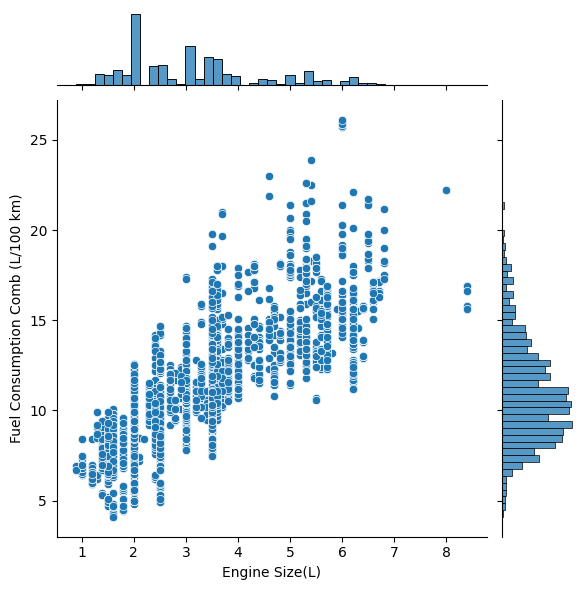

In [12]:
sns.jointplot(x='Engine Size(L)', y='Fuel Consumption Comb (L/100 km)', data=cars)
plt.show()


### Distribution of CO2 emissions:


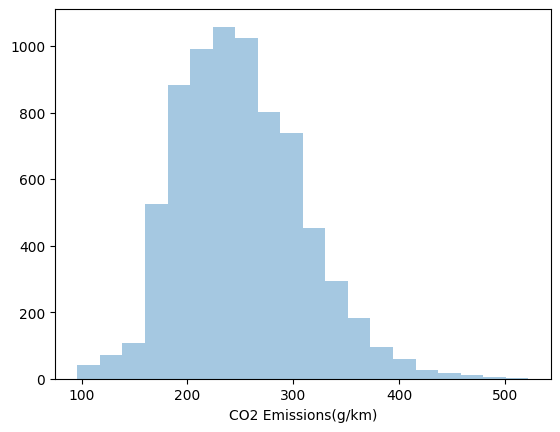

In [13]:
sns.distplot(cars['CO2 Emissions(g/km)'], kde=False, bins=20)
plt.show()


### Histogram of the CO2 emissions in Canada:

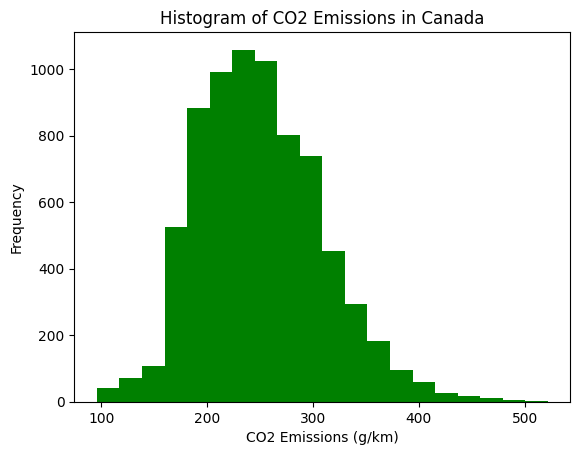

In [14]:
import matplotlib.pyplot as plt

# Plot a histogram of the CO2 emissions
plt.hist(cars['CO2 Emissions(g/km)'], bins=20, color='green')

# Add labels and title to the histogram
plt.xlabel("CO2 Emissions (g/km)")
plt.ylabel("Frequency")
plt.title("Histogram of CO2 Emissions in Canada")

# Show the plot
plt.show()

## Conclusion
Based on the analysis of Canadian vehicle emissions data, it was found that the average CO2 emissions for all vehicles was approximately 250.5 g/km. The median engine size was 3.0 liters. The correlation between fuel consumption and CO2 emissions was found to be positive, with higher fuel consumption leading to higher CO2 emissions.

When comparing CO2 emissions between different vehicle classes, the average CO2 emissions were found to be lower for vehicles in the 'MID-SIZE' class, compared to those in the 'SUV - SMALL' class. Additionally, vehicles with an engine size of 2.0 liters or smaller had lower average CO2 emissions compared to larger engine vehicles.

Overall, the results of this analysis provide valuable insights into the relationship between vehicle characteristics and emissions, and can inform the development of emissions regulations and guidelines.

In conclusion, to reduce CO2 emissions from vehicles, policy makers could focus on promoting vehicles with smaller engines and fuel-efficient technologies, as well as encouraging the use of alternative fuels.